# Lab 4.05 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 5 - Survey of Australian Students

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/survey.csv")
df.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [ ]:
print("Exer:", df["Exer"].unique())
print("Smoke:", df["Smoke"].unique())

In [ ]:
# Definieer ordinale volgorde
exer_order = CategoricalDtype(categories=[ "Some", "Freq"], ordered=True)
smoke_order = CategoricalDtype(categories=["Never", "Occas", "Regul", "Heavy"], ordered=True)

# Pas toe
df["Exer"] = df["Exer"].astype(exer_order)
df["Smoke"] = df["Smoke"].astype(smoke_order)


Exer: ['Some' nan 'Freq']
Smoke: ['Never' 'Regul' 'Occas' 'Heavy' nan]


Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

### ✅ 1. Frequentietabel maken

In [5]:
observed = pd.crosstab(df["Exer"], df["Smoke"])
observed

Smoke,Never,Occas,Regul,Heavy
Exer,,,,
Some,84,4,7,3
Freq,87,12,9,7


### ✅ 2. Grafiek maken

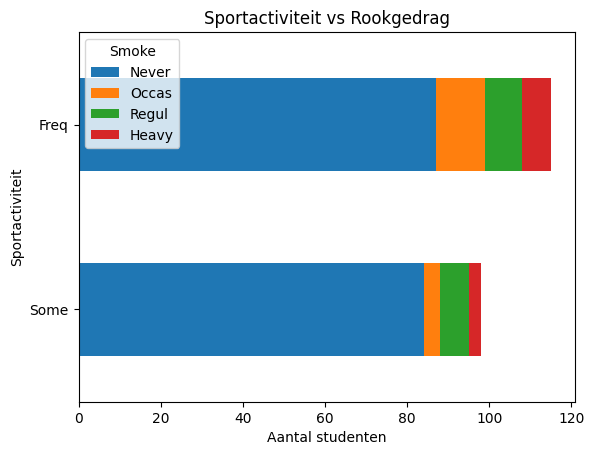

In [6]:
observed.plot(kind="barh", stacked=True)
plt.title("Sportactiviteit vs Rookgedrag")
plt.xlabel("Aantal studenten")
plt.ylabel("Sportactiviteit")
plt.show()

### ✅ 3. Verwachting bij de grafiek

 **Verwachting:**  
- Als de verhouding tussen rookgedrag ongeveer gelijk is voor elke sportgroep, dan zal de $( \chi^2 $)-waarde **laag** zijn.
- ➔ Hier lijkt het visueel alsof er **niet veel verschil** is.
- ➔ Dus: **lage** $( \chi^2 $) waarde verwacht.

### ✅ 4. Chi-squared test uitvoeren

In [7]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared statistic χ² = %.4f" % chi2)
print("Degrees of freedom = %d" % dof)
print("p-value = %.4f" % p)

Chi-squared statistic χ² = 4.5750
Degrees of freedom = 3
p-value = 0.2057


### ✅ 5. Kritieke waarde berekenen en H₀-test

In [8]:
alpha = 0.05
critical_value = stats.chi2.isf(alpha, df=dof)

print("Critical value g = %.4f" % critical_value)

if chi2 > critical_value:
    print(" Verwerp H₀: Er is een verband.")
else:
    print(" Verwerp H₀ niet: Geen verband.")

Critical value g = 7.8147
 Verwerp H₀ niet: Geen verband.


### ✅ 7. Cramér's V berekenen

Formule:
$$
V = \sqrt{\frac{\chi^2}{n \times (k-1)}}
$$

waarbij:
- $( n $) = totaal aantal waarnemingen
- $( k $) = het kleinste aantal categorieën van Exer of Smoke

In [9]:
n = observed.to_numpy().sum()
k = min(observed.shape)
cramers_v = np.sqrt(chi2 / (n * (k-1)))

print("Cramér's V = %.4f" % cramers_v)

Cramér's V = 0.1466


###  Cramér's V interpretatie

- Cramér's V is **klein** 
- ➔ **Zwak of geen verband**, dus zelfde conclusie als uit de chi-squared test.